In [216]:
import json
from json import JSONDecodeError
import requests
from pandas import json_normalize
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates


f = open("/Users/austinpaxton/Documents/credentials/quiver_quant_cred.json")
data = json.load(f)

auth_token = data["auth_token"]
base_url = data["base_URL"]
print(base_url)

headers_qq = {
    'accept': 'application/json',
    'X-CSRFToken': 'TyTJwjuEC7VV7mOqZ622haRaaUr0x0Ng4nrwSRFKQs7vdoBcJlK9qjAS69ghzhFu',
    'Authorization': f"Token {auth_token}"
}


https://api.quiverquant.com/beta/


In [153]:
#pull tiwtter followers on one ticker w quiver quant API

url = base_url + "historical/twitter/AAPL"

response = requests.get(url,headers=headers_qq)
twitter_df = json_normalize(response.json())
# twitter_df["Date"] = pd.to_datetime(twitter_df["Date"])
# twitter_df.set_index("Date",inplace=True)
display(twitter_df)
twitter_df.info()

,Date,Ticker,Followers,pct_change_day,pct_change_week,pct_change_month
0,2023-04-11,AAPL,9147509,0.016947,0.149005,0.524364
1,2023-04-10,AAPL,9145959,0.028469,0.156609,0.535591
2,2023-04-09,AAPL,9143356,0.013181,0.149117,0.519961
3,2023-04-08,AAPL,9142151,0.018008,0.148347,0.526441
4,2023-04-07,AAPL,9140505,0.015614,0.151183,0.530616
...,...,...,...,...,...,...
938,2020-05-11,AAPL,4333020,0.063668,0.593973,3.021270
939,2020-05-10,AAPL,4330263,0.067015,0.608587,3.010164
940,2020-05-09,AAPL,4327363,0.061415,0.617091,3.002140
941,2020-05-08,AAPL,4324707,0.066083,0.634962,3.024553


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              943 non-null    object 
 1   Ticker            943 non-null    object 
 2   Followers         943 non-null    int64  
 3   pct_change_day    943 non-null    float64
 4   pct_change_week   943 non-null    float64
 5   pct_change_month  943 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 44.3+ KB


In [111]:
#get Keys 
f = open("/Users/austinpaxton/Documents/credentials/ALPACA_cred.json")
data = json.load(f)

alpaca_key = data["KEY"]
alpaca_secret = data["SECRET_KEY"]


In [255]:
# pull AAPL stock price history w alpaca

from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.data.timeframe import TimeFrameUnit
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockLatestQuoteRequest
from datetime import datetime, timedelta


# keys required for stock historical data client
client = StockHistoricalDataClient(alpaca_key, alpaca_secret)

request = StockBarsRequest(symbol_or_symbols=["AAPL"], 
                               timeframe=TimeFrame.Day,
                                start="2020-01-01 00:00:00",
                              adjustment="split")

#important to set adjusement to "split" or it will defualt to raw data w jumps

AAPL_bars = client.get_stock_bars(request_params = request)["AAPL"] #use client initiated in above cell
print(AAPL_bars)
columns=["symbol","timestamp", "open","high","low", "close", "volume", 'trade_count', "vwap"]
#print(AAPL_bars)
AAPL_df = pd.DataFrame(AAPL_bars, columns=columns) # ask Zuraiz about tuples issue
#display(AAPL_df) 

print(type(AAPL_df.loc[0][0]))

#AAPL_df = AAPL_bars.df

#pd.to_datetime(AAPL_df.index)
display(AAPL_df)



[{   'close': 75.09,
    'high': 75.15,
    'low': 73.8,
    'open': 74.06,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2020, 1, 2, 5, 0, tzinfo=datetime.timezone.utc),
    'trade_count': 283487.0,
    'volume': 135650672.0,
    'vwap': 74.61}, {   'close': 74.36,
    'high': 75.15,
    'low': 74.13,
    'open': 74.29,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2020, 1, 3, 5, 0, tzinfo=datetime.timezone.utc),
    'trade_count': 280941.0,
    'volume': 146535580.0,
    'vwap': 74.7}, {   'close': 74.95,
    'high': 74.99,
    'low': 73.19,
    'open': 73.45,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2020, 1, 6, 5, 0, tzinfo=datetime.timezone.utc),
    'trade_count': 242866.0,
    'volume': 118579096.0,
    'vwap': 74.45}, {   'close': 74.6,
    'high': 75.22,
    'low': 74.37,
    'open': 74.96,
    'symbol': 'AAPL',
    'timestamp': datetime.datetime(2020, 1, 7, 5, 0, tzinfo=datetime.timezone.utc),
    'trade_count': 227869.0,
    'volume': 111

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,"(symbol, AAPL)","(timestamp, 2020-01-02 05:00:00+00:00)","(open, 74.06)","(high, 75.15)","(low, 73.8)","(close, 75.09)","(volume, 135650672.0)","(trade_count, 283487.0)","(vwap, 74.61)"
1,"(symbol, AAPL)","(timestamp, 2020-01-03 05:00:00+00:00)","(open, 74.29)","(high, 75.15)","(low, 74.13)","(close, 74.36)","(volume, 146535580.0)","(trade_count, 280941.0)","(vwap, 74.7)"
2,"(symbol, AAPL)","(timestamp, 2020-01-06 05:00:00+00:00)","(open, 73.45)","(high, 74.99)","(low, 73.19)","(close, 74.95)","(volume, 118579096.0)","(trade_count, 242866.0)","(vwap, 74.45)"
3,"(symbol, AAPL)","(timestamp, 2020-01-07 05:00:00+00:00)","(open, 74.96)","(high, 75.22)","(low, 74.37)","(close, 74.6)","(volume, 111510672.0)","(trade_count, 227869.0)","(vwap, 74.73)"
4,"(symbol, AAPL)","(timestamp, 2020-01-08 05:00:00+00:00)","(open, 74.29)","(high, 76.11)","(low, 74.29)","(close, 75.8)","(volume, 132363788.0)","(trade_count, 261771.0)","(vwap, 75.29)"
...,...,...,...,...,...,...,...,...,...
819,"(symbol, AAPL)","(timestamp, 2023-04-04 04:00:00+00:00)","(open, 166.595)","(high, 166.84)","(low, 165.11)","(close, 165.63)","(volume, 46323527.0)","(trade_count, 456992.0)","(vwap, 165.912926)"
820,"(symbol, AAPL)","(timestamp, 2023-04-05 04:00:00+00:00)","(open, 164.74)","(high, 165.05)","(low, 161.8)","(close, 163.76)","(volume, 51534760.0)","(trade_count, 534317.0)","(vwap, 163.491178)"
821,"(symbol, AAPL)","(timestamp, 2023-04-06 04:00:00+00:00)","(open, 162.43)","(high, 164.9584)","(low, 162.0)","(close, 164.66)","(volume, 45390035.0)","(trade_count, 446212.0)","(vwap, 164.025748)"
822,"(symbol, AAPL)","(timestamp, 2023-04-10 04:00:00+00:00)","(open, 161.42)","(high, 162.03)","(low, 160.08)","(close, 162.03)","(volume, 47606637.0)","(trade_count, 562222.0)","(vwap, 161.262424)"


In [256]:
timestamp = []
open_ =[]
ticker =[]
volume = []
trade_count = []
for bar in AAPL_bars:
    timestamp.append(bar.timestamp)
    open_.append(bar.open)
    ticker.append(bar.symbol)
    volume.append(bar.volume)
    trade_count.append(bar.trade_count)
    
col_names = ["TIMESTAMP", "TICKER", "OPEN", "VOLUME", "TRADE_COUNT"]
data_dict = {
    "TIMESTAMP": timestamp,
    "TICKER": ticker,
    "OPEN": open_,
    "VOLUME": volume,
    "TRADE_COUNT": trade_count}
stock_df = pd.DataFrame(data_dict)



In [257]:
def convert_to_date(timestamp):
    return pd.to_datetime(timestamp)

In [258]:
time = stock_df["TIMESTAMP"][0]
print(type(time))
date = convert_to_date(time)
print(type(date))
print(date)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-01-02 05:00:00+00:00


In [259]:
stock_df["Date"]=stock_df["TIMESTAMP"].dt.strftime("%Y-%m-%d")
stock_df.drop(columns=["TIMESTAMP"],inplace=True)
#stock_df.set_index("Date",inplace=True)
display(stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TICKER       824 non-null    object 
 1   OPEN         824 non-null    float64
 2   VOLUME       824 non-null    float64
 3   TRADE_COUNT  824 non-null    float64
 4   Date         824 non-null    object 
dtypes: float64(3), object(2)
memory usage: 32.3+ KB


None

In [260]:
#merge twitter and stock dataframes for AAPL by Date
AAPL_df=pd.merge(twitter_df,stock_df, on="Date")

#convert date to datetime and sort into chronological order
AAPL_df["Date"] = pd.to_datetime(AAPL_df["Date"])
AAPL_df.info()
AAPL_df.sort_values(by="Date",axis=0, inplace=True)
AAPL_df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              648 non-null    datetime64[ns]
 1   Ticker            648 non-null    object        
 2   Followers         648 non-null    int64         
 3   pct_change_day    648 non-null    float64       
 4   pct_change_week   648 non-null    float64       
 5   pct_change_month  648 non-null    float64       
 6   TICKER            648 non-null    object        
 7   OPEN              648 non-null    float64       
 8   VOLUME            648 non-null    float64       
 9   TRADE_COUNT       648 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 55.7+ KB


,Date,Ticker,Followers,pct_change_day,pct_change_week,pct_change_month,TICKER,OPEN,VOLUME,TRADE_COUNT
0,2020-05-07,AAPL,4321851,0.082092,0.647290,3.541470,AAPL,75.810,115215356.0,273197.0
1,2020-05-08,AAPL,4324707,0.066083,0.634962,3.024553,AAPL,76.410,134047940.0,318777.0
2,2020-05-11,AAPL,4333020,0.063668,0.593973,3.021270,AAPL,77.030,145954060.0,336682.0
3,2020-05-12,AAPL,4336638,0.083498,0.503603,3.039381,AAPL,79.460,162306360.0,372896.0
4,2020-05-13,AAPL,4339602,0.068348,0.493156,2.437190,AAPL,78.040,200623452.0,489396.0
...,...,...,...,...,...,...,...,...,...,...
643,2023-04-04,AAPL,9133899,0.024541,0.124922,0.517250,AAPL,166.595,46323527.0,456992.0
644,2023-04-05,AAPL,9136933,0.033217,0.148333,0.525007,AAPL,164.740,51534760.0,534317.0
645,2023-04-06,AAPL,9139078,0.023476,0.151481,0.536815,AAPL,162.430,45390035.0,446212.0
646,2023-04-10,AAPL,9145959,0.028469,0.156609,0.535591,AAPL,161.420,47606637.0,562222.0


In [261]:
AAPL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 647 to 0
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              648 non-null    datetime64[ns]
 1   Ticker            648 non-null    object        
 2   Followers         648 non-null    int64         
 3   pct_change_day    648 non-null    float64       
 4   pct_change_week   648 non-null    float64       
 5   pct_change_month  648 non-null    float64       
 6   TICKER            648 non-null    object        
 7   OPEN              648 non-null    float64       
 8   VOLUME            648 non-null    float64       
 9   TRADE_COUNT       648 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 55.7+ KB


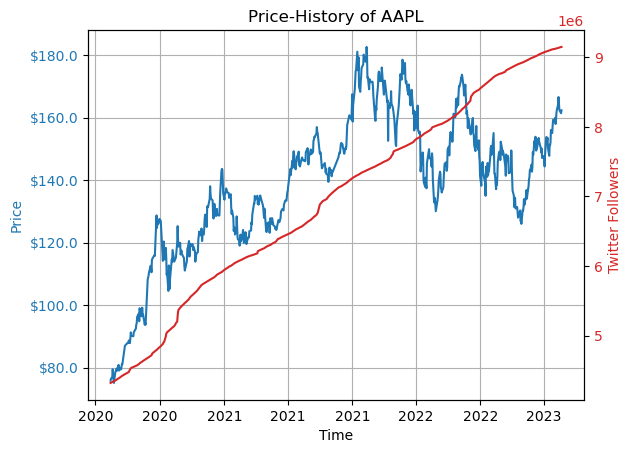

In [270]:


def y_fmt(x,y):
    return '${}'.format(x)

fig, ax1 = plt.subplots()
color = "tab:blue"
ax1.plot(AAPL_df.Date,AAPL_df.OPEN, color=color)
ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
five_year_locator = mdates.MonthLocator(interval=5)
ax1.xaxis.set_major_locator(five_year_locator)
ax1.grid()
ax1.title.set_text('AAPL Stock Price and Twitter Followers')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color=color)
ax1.tick_params(axis='y',labelcolor=color)

color = "tab:red"
ax2 = ax1.twinx()
ax2.set_ylabel("Twitter Followers", color= color)
ax2.plot(AAPL_df.Date, AAPL_df.Followers, color=color)
ax2.tick_params(axis='y',labelcolor=color)
# This data is inaccurate.... trying again with another symbol


In [263]:
# function to convert alpaca bars output to dataframe
def bars_to_df(bars):
    timestamp = []
    ticker =[]
    open_ =[]
    high =[]
    low = []
    close =[]
    volume = []
    trade_count = []
    vwap=[]
    for bar in bars:
        timestamp.append(bar.timestamp)
        ticker.append(bar.symbol)
        open_.append(bar.open)
        high.append(bar.high)
        low.append(bar.low)
        close.append(bar.close)
        volume.append(bar.volume)
        trade_count.append(bar.trade_count)
        vwap.append(bar.vwap)

    col_names = ["Timestamp",
                 "Ticker", 
                 "Open", 
                 'High', 
                 'Low',
                 'Close',
                 "Volume",
                 "TradeCount",
                 'VWAP']
    
    data_dict = {
        "Timestamp": timestamp,
        "Ticker": ticker, 
        "Open": open_, 
        'High': high, 
        'Low': low,
        'Close': close,
        "Volume": volume,
        "TradeCount": trade_count,
        'VWAP': vwap}
    return pd.DataFrame(data_dict)


In [264]:
# test function
request = StockBarsRequest(symbol_or_symbols=["MSFT"], 
                               timeframe=TimeFrame.Day,
                                start="2020-01-01 00:00:00",
                              limit=10000)
MSFT_bars = client.get_stock_bars(request_params = request)["MSFT"]

MSFT_df = bars_to_df(MSFT_bars)
print(MSFT_df)

                    Timestamp Ticker     Open      High       Low   Close  \
0   2020-01-02 05:00:00+00:00   MSFT  158.780  160.7300  158.3300  160.62   
1   2020-01-03 05:00:00+00:00   MSFT  158.320  159.9450  158.0600  158.62   
2   2020-01-06 05:00:00+00:00   MSFT  157.080  159.1000  156.5100  159.03   
3   2020-01-07 05:00:00+00:00   MSFT  159.320  159.6700  157.3200  157.58   
4   2020-01-08 05:00:00+00:00   MSFT  158.930  160.8000  157.9491  160.09   
..                        ...    ...      ...       ...       ...     ...   
819 2023-04-04 04:00:00+00:00   MSFT  287.230  290.4499  285.6700  287.18   
820 2023-04-05 04:00:00+00:00   MSFT  285.850  287.1500  282.9200  284.34   
821 2023-04-06 04:00:00+00:00   MSFT  283.210  292.0800  282.0300  291.60   
822 2023-04-10 04:00:00+00:00   MSFT  289.208  289.6000  284.7100  289.39   
823 2023-04-11 04:00:00+00:00   MSFT  285.750  285.9800  281.6400  282.83   

         Volume  TradeCount        VWAP  
0    22634631.0    175505.0  159.

## Data Prepared -> Time to Test Domain Importance
* Start off with using linear regression to compare twitter follower count correlation to stock price and volume


In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [276]:
X = np.array(AAPL_df.Followers).reshape(-1,1)
y = np.array(AAPL_df.OPEN).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test,y_test))

0.525031578508967


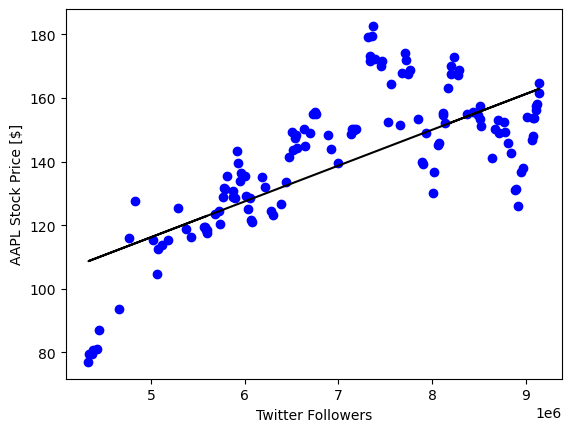

In [280]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Twitter Followers")
plt.ylabel("AAPL Stock Price [$]")
 
plt.show()

In [282]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 11.698844551848648
MSE: 229.06954221376571
RMSE: 15.135043515423591
